In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import squidpy as sq

/home/siyuan/miniconda3/envs/biovis/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/home/siyuan/miniconda3/envs/biovis/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [2]:
cell_ids = [
    "53579",
    "53609",
    "53617",
    "53742",
    "53825",
    "53827",
    "53895",
    "53910",
    "53931",
    "53962",
    "53982",
    "53986",
    "53997",
    "54029",
    "54068",
    "54107",
    "54112",
    "54114",
    "54125",
    "54145",
    "54174",
    "54186",
    "54229",
    "54234",
    "54301",
    "54332",
    "54421",
    "54472",
    "54493",
    "54494",
    "54495",
    "54496",
    "54510",
    "54552",
    "54561",
    "54598",
    "54621",
    "54645",
    "54650",
    "54694",
    "54770",
    "54798",
    "54847",
    "54850",
    "54874",
    "54877",
    "54909",
    "54923",
    "54927",
    "54932",
    "54948",
    "54950",
    "54965",
    "54986",
    "54994",
    "55004",
    "55012",
    "55024",
    "55032",
    "55082",
    "55088",
    "55117",
    "55140",
    "55169",
    "55297",
    "55327",
    "55331",
    "55335",
    "55379",
    "55407",
    "55408",
    "55419",
    "55436",
    "55484",
    "55498",
    "55508",
    "55531",
    "55553",
    "55589",
    "55618",
    "55654",
    "55664",
    "55665",
    "55671",
    "55690",
    "55699",
    "55709",
    "55731",
    "55787",
    "55790",
    "55797",
    "55823",
    "55826",
    "55856",
    "55869",
    "55873",
    "55884",
    "55933",
    "55936",
    "55943",
    "55959",
    "55961",
    "55964",
    "56000",
    "56009",
    "56037",
    "56064",
    "56071",
    "56082",
    "56123",
    "56129",
    "56164",
    "56166",
    "56234",
    "56239",
    "56242",
    "56246",
    "56259",
    "56265",
    "56271",
    "56348",
    "56349",
    "56362",
    "56372",
    "56404",
    "56447",
    "56459",
    "56471",
    "56487",
    "56491",
    "56499",
    "56505",
    "56513",
    "56534",
    "56545",
    "56575",
    "56577",
    "56578",
    "56631",
    "56737",
    "56751",
    "56752",
    "56836",
    "56857",
    "56883",
    "56885",
    "56893",
    "56911",
    "56914",
    "56922",
    "56926",
    "56964",
    "57003",
    "57007",
    "57018",
    "57021",
    "57046",
    "57052",
    "57058",
    "57071",
    "57095",
    "57118",
    "57145",
    "57155",
    "57162",
    "57175",
    "57180",
    "57215",
    "57229",
    "57239",
    "57247",
    "57251",
    "57356",
    "57394",
    "57403",
    "57409",
    "57459",
    "57467",
    "57516",
    "57538",
    "57563",
    "57658",
    "57663",
    "57690",
    "57734",
    "57749",
    "57768",
    "57778",
    "57781",
    "57801",
    "57828",
    "57843",
    "57849",
    "57855",
    "57869",
    "58022",
    "58062",
    "58084",
    "58092",
    "58102",
    "58172",
    "58190",
    "58192",
    "58212",
    "58221",
    "58288",
    "58368",
    "58404",
    "58407",
    "58440",
    "58500",
    "58528",
    "58607",
    "58617",
    "58640",
    "58670",
    "58690",
    "58703",
    "58763",
    "58812",
    "58898",
    "58904",
    "58924",
    "59016",
    "59062",
    "59153",
    "59223",
    "59282",
    "59329",
    "59357",
    "59458",
    "59469",
    "59497",
    "59547",
    "59623",
    "59723",
    "59807",
    "59864",
    "59956",
    "59969",
    "60003",
    "60056",
    "60113",
    "60117",
    "60146",
    "60222",
    "60237",
    "60313",
    "60379",
    "60449",
    "60578",
    "60598",
    "60658",
    "60672",
    "60697",
    "60738",
    "60791",
    "60862",
    "60910",
    "60951",
    "61026",
    "61045",
    "61154",
    "61167",
    "61169",
    "61189",
    "61224",
    "61281",
    "61285",
    "61321",
    "61330",
    "61345",
    "61397",
    "61412",
    "61435",
    "61524",
    "61561",
    "61800",
    "61915",
    "61933",
    "62005",
    "62033",
    "62128",
    "62156",
    "62167",
    "62485",
    "62518",
    "62565",
    "62574",
    "62593",
    "62614",
    "62775",
    "62829",
    "63072",
    "63102",
    "63131",
    "63177",
    "63295",
    "63360",
    "63431",
    "63462",
    "63574",
    "63599",
    "63636",
    "63659",
    "63748",
    "63904",
    "63950",
    "64046",
    "64083",
    "64440",
    "64441",
    "64501",
    "64547",
    "64642",
    "64683",
    "64720",
    "64763",
    "64817",
    "64857",
    "64859",
    "65008",
    "65021",
    "65116",
    "65171",
    "65186",
    "65307",
    "65450",
    "65551",
    "65601",
    "65617",
    "65645",
    "65656",
    "65800",
    "65840",
    "65848",
    "66012",
    "66015",
    "66096",
    "66420",
    "66460",
    "66496",
    "66514",
    "66528",
    "66834",
    "66868",
    "66889",
    "66997",
    "67076",
    "67283",
    "67340",
    "67364",
    "67444",
    "67449",
    "67486",
    "67835",
    "67856",
    "67968",
    "67973",
    "68054",
    "138114"
]

In [3]:
cdata = sc.read_h5ad("../Example_Data/H1-TXK6Z4X-A1_2um/skin_TXK6Z4X_A1_2um_b2c_qc.h5ad")
cdata

AnnData object with n_obs × n_vars = 78865 × 17079
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'predicted_labels', 'conf_score', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial', 'spatial_cropped_150_buffer'
    obsp: 'connectivities', 'distances'

In [9]:
import pandas as pd

# 转成 DataFrame 方便操作
df = cdata.obs[['predicted_labels', 'conf_score']].copy()

# 每个细胞类型的平均置信度
mean_conf = df.groupby('predicted_labels')['conf_score'].mean()

# 置信度分布的更多统计（均值、标准差、数量、最小值、最大值）
summary_conf = df.groupby('predicted_labels')['conf_score'].agg(['mean', 'std', 'count', 'min', 'max'])

summary_conf


/tmp/ipykernel_26662/3427993962.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_conf = df.groupby('predicted_labels')['conf_score'].mean()
/tmp/ipykernel_26662/3427993962.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_conf = df.groupby('predicted_labels')['conf_score'].agg(['mean', 'std', 'count', 'min', 'max'])


,mean,std,count,min,max
predicted_labels,,,,,
DC1,0.069384,0.075739,66,0.002564,0.526025
DC2,0.120078,0.194227,25,0.004271,0.804991
Differentiated_KC,0.733276,0.314024,37650,0.003152,1.000000
F1,0.387297,0.310363,3576,0.003129,0.999977
F2,0.335545,0.288986,4694,0.000918,0.999307
F3,0.127663,0.173713,59,0.004099,0.895638
ILC1_3,0.119723,0.153200,225,0.003227,0.832194
ILC1_NK,0.270480,NaN,1,0.270480,0.270480
ILC2,0.058378,0.056000,12,0.007844,0.180311


/tmp/ipykernel_26662/1077831031.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby('predicted_labels')['conf_score'].agg(


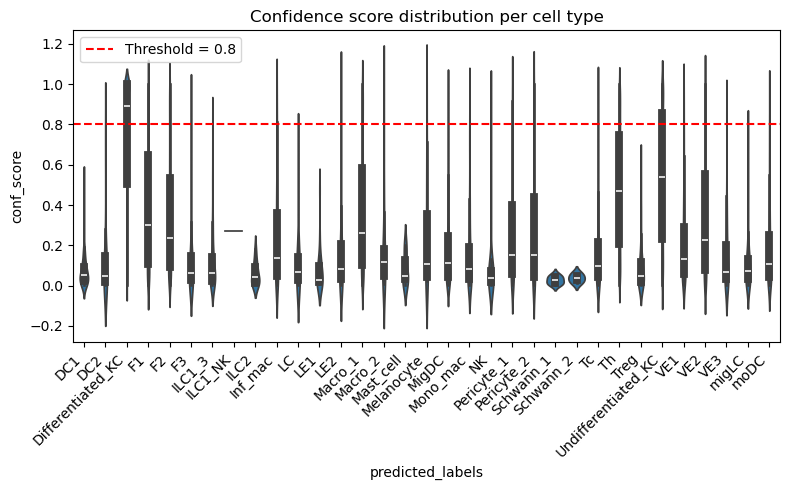

       predicted_labels    median   IQR_25%   IQR_75%  high_conf_fraction  \
0                   DC1  0.052725  0.021472  0.094381            0.000000   
1                   DC2  0.045203  0.016059  0.144888            0.040000   
2     Differentiated_KC  0.889779  0.504460  0.999305            0.577902   
3                    F1  0.302482  0.105541  0.648615            0.158557   
4                    F2  0.234487  0.090304  0.533296            0.111632   
5                    F3  0.061245  0.026511  0.147162            0.016949   
6                ILC1_3  0.060148  0.024779  0.142669            0.008889   
7               ILC1_NK  0.270480  0.270480  0.270480            0.000000   
8                  ILC2  0.043747  0.012310  0.093207            0.000000   
9               Inf_mac  0.137345  0.049636  0.360780            0.039370   
10                   LC  0.066281  0.030227  0.141096            0.000000   
11                  LE1  0.027054  0.015874  0.097765            0.000000   

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def summarize_confidence_distribution(adata, threshold=0.8, figsize=(8,5)):
    """
    Summarize confidence score distribution per predicted cell type
    and visualize with violin plot.

    Parameters
    ----------
    adata : AnnData
        AnnData object with obs containing 'predicted_labels' and 'conf_score'
    threshold : float, optional
        Threshold to define "high confidence" cells, default=0.8
    figsize : tuple, optional
        Figure size for the violin plot

    Returns
    -------
    pd.DataFrame
        Summary table with median, IQR, high-confidence fraction, and cell count
    """
    df = adata.obs[['predicted_labels', 'conf_score']].copy()
    
    summary = df.groupby('predicted_labels')['conf_score'].agg(
        median='median',
        q25=lambda x: x.quantile(0.25),
        q75=lambda x: x.quantile(0.75),
        high_conf_fraction=lambda x: (x > threshold).mean(),
        n_cells='count'
    ).reset_index()

    # 重命名列更直观
    summary = summary.rename(columns={
        'q25': 'IQR_25%',
        'q75': 'IQR_75%'
    })

    # --- 可视化 ---
    plt.figure(figsize=figsize)
    sns.violinplot(x='predicted_labels', y='conf_score', data=df, inner="box")
    plt.axhline(threshold, color='red', linestyle='--', label=f"Threshold = {threshold}")
    plt.xticks(rotation=45, ha='right')
    plt.title("Confidence score distribution per cell type")
    plt.legend()
    plt.tight_layout()
    plt.show()

    return summary

summary_table = summarize_confidence_distribution(cdata, threshold=0.8)
print(summary_table)



/home/siyuan/miniconda3/envs/biovis/lib/python3.11/site-packages/legacy_api_wrap/__init__.py:82: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  return fn(*args_all, **kw)
/home/siyuan/miniconda3/envs/biovis/lib/python3.11/functools.py:909: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/home/siyuan/miniconda3/envs/biovis/lib/python3.11/site-packages/scanpy/preprocessing/_pca/__init__.py:227: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  mask_var_param, mask_var = _handle_mask_var(


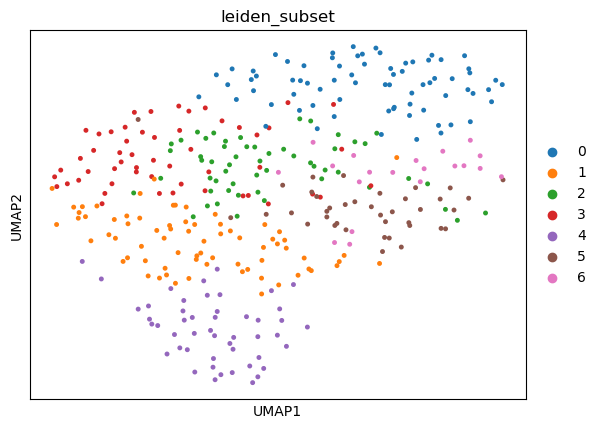

In [13]:
cdata = cdata[cell_ids].copy()

sc.pp.highly_variable_genes(cdata, n_top_genes=2000, flavor="seurat_v3")

sc.pp.normalize_total(cdata)
sc.pp.log1p(cdata)
sc.pp.scale(cdata, max_value=10)

sc.tl.pca(cdata, use_highly_variable=True)
sc.pp.neighbors(cdata, n_neighbors=15, n_pcs=30)
sc.tl.umap(cdata)

# custom umap for subset of cells
cdata.obsm['X_umap_subset'] = cdata.obsm['X_umap'].copy()

sc.tl.leiden(cdata, resolution=1, key_added='leiden_subset')
sc.pl.umap(cdata, color=['leiden_subset'], size=50)

100%|██████████| 1000/1000 [00:00<00:00, 10115.63/s]


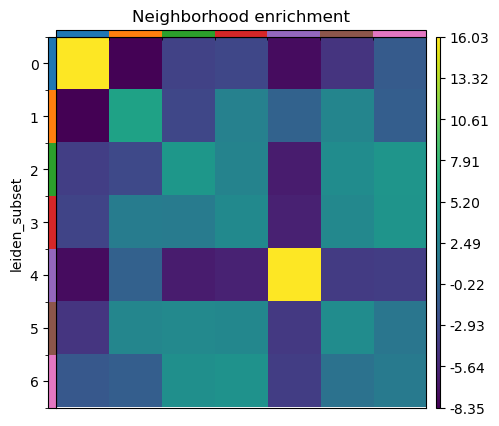

In [14]:
sq.gr.spatial_neighbors(cdata)
sq.gr.nhood_enrichment(cdata, cluster_key="leiden_subset")
sq.pl.nhood_enrichment(cdata, cluster_key="leiden_subset")

In [15]:
# Enrichment results
nhood_results = cdata.uns['leiden_subset_nhood_enrichment']

available_keys = list(nhood_results.keys())
print("Available result keys:", available_keys)

# Extract Z-score matrix
enrichment_results = nhood_results['zscore']
print("Z-score matrix shape:", enrichment_results.shape)

Available result keys: ['zscore', 'count']
Z-score matrix shape: (7, 7)


In [16]:
# Get cluster names
cluster_names = sorted(cdata.obs['leiden_subset'].unique())
print("Cluster names:", cluster_names)
print("Number of clusters:", len(cluster_names))

# Convert numpy array to DataFrame
enrichment_df = pd.DataFrame(
    enrichment_results, 
    index=cluster_names, 
    columns=cluster_names
)

print("Enrichment matrix as DataFrame:")
print(enrichment_df.head())

Cluster names: ['0', '1', '2', '3', '4', '5', '6']
Number of clusters: 7
Enrichment matrix as DataFrame:
           0         1         2         3          4         5         6
0  16.033237 -8.172517 -3.571901 -3.113910  -7.547742 -4.726331 -1.389430
1  -8.348974  5.669516 -3.117644  2.368967  -0.714760  2.767132 -1.061547
2  -3.838476 -2.973083  4.592555  2.554192  -6.482838  3.477541  4.337742
3  -3.307849  1.910174  1.819990  3.227890  -6.108707  3.069331  4.300336
4  -7.566357 -0.734631 -6.486378 -6.033241  15.996341 -4.084328 -3.874834


In [17]:
def rank_by_self_enrichment(enrichment_matrix, cluster_names):
    """Sorting based on diagonal Z-score"""
    if isinstance(enrichment_matrix, pd.DataFrame):
        matrix = enrichment_matrix.values
        names = enrichment_matrix.index.tolist()
    else:
        matrix = enrichment_matrix
        names = cluster_names
    
    self_enrichment = np.diag(matrix)
    
    ranking_df = pd.DataFrame({
        'cluster': names,
        'self_enrichment_zscore': self_enrichment
    }).sort_values('self_enrichment_zscore', ascending=False)
    
    return ranking_df

def rank_by_significant_interactions(enrichment_matrix, cluster_names, zscore_threshold=2.0):
    """Sorting based on the number of significant interactions"""
    if isinstance(enrichment_matrix, pd.DataFrame):
        matrix = enrichment_matrix.values
        names = enrichment_matrix.index.tolist()
    else:
        matrix = enrichment_matrix
        names = cluster_names
    
    results = []
    n_clusters = len(names)
    
    for i, cluster in enumerate(names):
        # Get the row for this cluster (interactions with other clusters)
        interactions = matrix[i, :]
        
        # Calculate significant interactions
        significant_positive = (interactions > zscore_threshold).sum()
        significant_negative = (interactions < -zscore_threshold).sum()
        total_significant = significant_positive + significant_negative
        
        results.append({
            'cluster': cluster,
            'significant_interactions': total_significant,
            'positive_interactions': significant_positive,
            'negative_interactions': significant_negative,
            'max_zscore': interactions.max(),
            'min_zscore': interactions.min(),
            'self_enrichment': matrix[i, i]
        })
    
    return pd.DataFrame(results).sort_values('significant_interactions', ascending=False)

def rank_by_spatial_clustering(enrichment_matrix, cluster_names):
    """Sorting based on spatial clustering pattern"""
    # Ensure it's a numpy array
    if isinstance(enrichment_matrix, pd.DataFrame):
        matrix = enrichment_matrix.values
        names = enrichment_matrix.index.tolist()
    else:
        matrix = enrichment_matrix
        names = cluster_names
    
    results = []
    n_clusters = len(names)
    
    for i, cluster in enumerate(names):
        # Self-enrichment
        self_enrich = matrix[i, i]
        
        # Interactions with other clusters (excluding self)
        row_interactions = np.concatenate([matrix[i, :i], matrix[i, i+1:]])
        col_interactions = np.concatenate([matrix[:i, i], matrix[i+1:, i]])
        
        avg_outgoing = row_interactions.mean() if len(row_interactions) > 0 else 0
        avg_incoming = col_interactions.mean() if len(col_interactions) > 0 else 0
        
        results.append({
            'cluster': cluster,
            'self_enrichment': self_enrich,
            'avg_outgoing_interaction': avg_outgoing,
            'avg_incoming_interaction': avg_incoming,
            'spatial_coherence': self_enrich - max(avg_outgoing, avg_incoming)
        })
    
    return pd.DataFrame(results).sort_values('spatial_coherence', ascending=False)

# Execute sorting
cluster_names = sorted(cdata.obs['leiden_subset'].unique())

print("=== Method 1: Self-enrichment ranking ===")
rank1 = rank_by_self_enrichment(enrichment_results, cluster_names)
print(rank1)

print("\n=== Method 2: Significant interactions ranking ===")
rank2 = rank_by_significant_interactions(enrichment_results, cluster_names)
print(rank2)

print("\n=== Method 3: Spatial coherence ranking ===")
rank3 = rank_by_spatial_clustering(enrichment_results, cluster_names)
print(rank3)

=== Method 1: Self-enrichment ranking ===
  cluster  self_enrichment_zscore
0       0               16.033237
4       4               15.996341
1       1                5.669516
2       2                4.592555
5       5                3.489323
3       3                3.227890
6       6                1.572919

=== Method 2: Significant interactions ranking ===
  cluster  significant_interactions  positive_interactions  \
2       2                         7                      4   
0       0                         6                      1   
4       4                         6                      1   
5       5                         6                      4   
1       1                         5                      3   
3       3                         5                      3   
6       6                         3                      2   

   negative_interactions  max_zscore  min_zscore  self_enrichment  
2                      3    4.592555   -6.482838         4.592555  
0

### Rank3: rank_by_spatial_clustering (Spatial Clustering)
**1. Principle:**

Compares self-enrichment with external interactions.
Calculates "spatial coherence": self-clustering vs. interactions with neighbors.

**2. Calculation method:**
python spatial_coherence = self_enrichment - max(avg_outgoing, avg_incoming)
Biological significance:

High-scoring clusters: Strong internal clustering and relatively independent of other clusters.
Low-scoring clusters: Either loosely organized or highly intermixed with other clusters.
Suitable for identifying functional spatial domains and independent tissue units.

**3. Application scenarios:**

Identifying functionally independent tissue regions
Finding cell populations with well-defined boundaries
Studying tissue compartmentalization patterns.

In [18]:
rank3

,cluster,self_enrichment,avg_outgoing_interaction,avg_incoming_interaction,spatial_coherence
4,4,15.996341,-4.796628,-4.853226,20.792969
0,0,16.033237,-4.753639,-4.884047,20.786876
1,1,5.669516,-1.351138,-1.380592,7.020654
2,2,4.592555,-0.487487,-0.738401,5.080043
5,5,3.489323,0.200295,0.226926,3.262396
3,3,3.227890,0.280546,0.466441,2.761450
6,6,1.572919,0.332804,0.587652,0.985267
